In [34]:
!export CUDA_VISIBLE_DEVICES=0

In [35]:
from main_simple_lib import *

In [36]:
import pickle
img_train_path = "/data/mn27889/pvqa/images/test/"
qas_train_path = "/data/mn27889/pvqa/qas/test/test_qa.pkl"

with open(qas_train_path, 'rb') as file:
    pvqa_qas = pickle.load(file)

In [37]:
qas_yes_no = [qas for qas in pvqa_qas if qas['answer'] == 'yes' or qas['answer'] == 'no']
ques_yes_no = [qas['question'] for qas in qas_yes_no]
ans_yes_no = [qas['answer'] for qas in qas_yes_no]
img_yes_no = [qas['image']  for qas in qas_yes_no]
img_yes_no_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_yes_no]

In [38]:
qas_general = [qas for qas in pvqa_qas if qas['answer'] != 'yes' and qas['answer'] != 'no']
ques_general = [qas['question'] for qas in qas_general]
ans_general = [qas['answer'] for qas in qas_general]
img_general = [qas['image']  for qas in qas_general]
img_general_path = [img_train_path + qas['image'] + '.jpg' for qas in qas_general]

In [39]:
# for i, img in enumerate(img_general):
#     if img == "test_0013":
#         print(i)

### For a Pathology Image

What are the tubular epithelial cells distended with?

cytoplasmic vacuoles

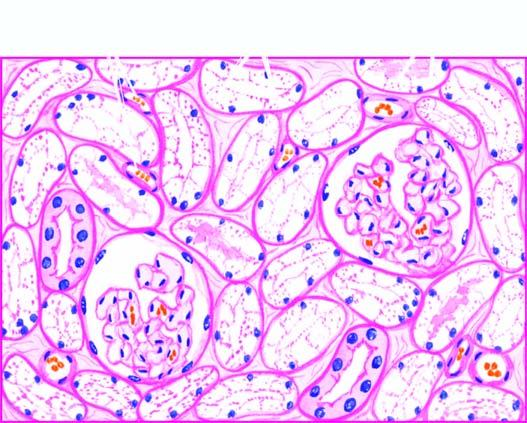

In [29]:
idx = 219
query = ques_general[idx]
query_ans = ans_general[idx]
query_img = Image.open(img_general_path[idx]).convert(mode="RGB")
print(query)
print(query_ans)
query_img

In [9]:
# Baseline: llava-med
image_patch = ImagePatch(query_img)                       
image_patch.llava_med_general_query(query)

'Assistant: tumor'

In [24]:
# ans = image_patch.llm_query(f"To solve the question: {query}, give me the reasoning small questions to answer this question")
# print(ans)


Sure! Here are some small questions to help understand what glioblastoma is:

1. What is the definition of glioblastoma?
2. What are the typical symptoms of glioblastoma?
3. What are the risk factors associated with glioblastoma?
4. How is glioblastoma diagnosed?
5. What are the common treatment options for glioblastoma?
6. What is the prognosis for patients with glioblastoma?
7. What are the key features of glioblastoma on imaging studies?
8. How does glioblastoma differ from other types of brain tumors?
9. What are the molecular characteristics of glioblastoma?
10. How does the histopathology of glioblastoma appear under the microscope?

In [26]:
# ans.split('\n')
# small_answers = []
# for question in ans.split('\n'):
#     small_answers.append(image_patch.llava_med_general_query(query))
# print(small_answers)
# image_patch.llm_query(" ".join(small_answers) + " Please summarize this information.")                    

[
    'Assistant: anaplastic tumor cells and oligodendrocytes',
    'Assistant: multilobular meningioma',
    'Assistant: anaplastic tumor cells and oligodendrocytes',
    'Assistant: anaplastic tumor cells and oligodendrocyte nuclei',
    'Assistant: a good example',
    'Assistant: a good example',
    'Assistant: a common but aggressive type of brain tumor',
    'Assistant: multilobular meningioma',
    'Assistant: a good example',
    'Assistant: multilobular meningioma',
    'Assistant: a good example',
    'Assistant: a good example'
]

'The pathology images show anaplastic tumor cells and oligodendrocytes, which are indicative of a common but aggressive type of brain tumor known as multilobular meningioma. This type of tumor is characterized by the presence of anaplastic tumor cells and oligodendrocyte nuclei.'

In [40]:
query = "What is present?"
code = get_code(query)

  0 def execute_command(image_patch):                                                                              
  1     # Check if the image patch contains any abnormalities or lesions                                           
  2     abnormality = image_patch.llava_med_identify_abnormality()                                                 
  3                                                                                                                
  4     if "calcification" in abnormality or "nodular densities" in abnormality:                                   
  5         return "The image contains abnormalities or lesions such as calcifications or nodular densities."      
  6     else:                                                                                                      
  7         return "No specific abnormalities or lesions were identified in the image."                            

In [41]:
execute_code(code, query_img, show_intermediate_steps=True)

Output()

Encountered error execute_command() takes 1 positional argument but 4 were given when trying to run with 
visualizations. Trying from scratch.

Encountered error execute_command() takes 1 positional argument but 4 were given when trying from scratch.